# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


## Extract Time Features

In [3]:
df = extract_time_features(cleaned_df)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


In [4]:
processed_df = process_ontime_payments(df)
processed_df

,CustomerId,OnTimePayments
0,CustomerId_1001,6
1,CustomerId_1002,22
2,CustomerId_1003,8
3,CustomerId_1005,18
4,CustomerId_1010,12
...,...,...
2633,CustomerId_992,8
2634,CustomerId_993,6
2635,CustomerId_994,1815
2636,CustomerId_996,30


In [5]:
merged_df = pd.merge(processed_df, df, on='CustomerId', how='left')
merged_df.head()

,CustomerId,OnTimePayments,TransactionId,BatchId,AccountId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,CustomerId_1001,6,TransactionId_11879,BatchId_61924,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_5,ProductId_15,...,ChannelId_3,10000.0,10000,2018-11-16 07:53:19+00:00,2,0,7,16,11,2018
1,CustomerId_1001,6,TransactionId_36212,BatchId_23377,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_6,ProductId_10,...,ChannelId_3,10000.0,10000,2018-11-16 08:16:24+00:00,2,0,8,16,11,2018
2,CustomerId_1001,6,TransactionId_64687,BatchId_30141,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,...,ChannelId_2,-200.0,200,2018-11-16 08:16:36+00:00,2,0,8,16,11,2018
3,CustomerId_1001,6,TransactionId_82586,BatchId_58031,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,...,ChannelId_2,-5000.0,5000,2018-11-16 08:16:40+00:00,2,0,8,16,11,2018
4,CustomerId_1001,6,TransactionId_84144,BatchId_118083,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_6,ProductId_10,...,ChannelId_3,5200.0,5200,2018-11-16 08:20:39+00:00,2,0,8,16,11,2018


processed_df = calculate_credit_utilization_ratio(cleaned_df)

## Extracting RFMS Features

Recency(R): Time since a customer's last purchase or transaction.

Frequency(F): Number of purchases or transactions a customer has made.

Monetary(M): Total amount of money a customer has spent with the business.

Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [6]:
rfms_df = create_rfms_features(merged_df)
rfms_df

,CustomerId,OnTimePayments,TransactionId,BatchId,AccountId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,StdDev
0,CustomerId_1001,6,TransactionId_11879,BatchId_61924,AccountId_661,SubscriptionId_4753,UGX,256,ProviderId_5,ProductId_15,...,2,0,7,16,11,2018,89,3,8400.000000,2262.741700
2,CustomerId_1001,6,TransactionId_64687,BatchId_30141,AccountId_4841,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,...,2,0,8,16,11,2018,0,30892,-898.301421,1845.804866
5,CustomerId_1002,22,TransactionId_75390,BatchId_26788,AccountId_662,SubscriptionId_2325,UGX,256,ProviderId_5,ProductId_1,...,4,0,18,15,11,2018,27,5,900.000000,374.165739
16,CustomerId_1003,8,TransactionId_20674,BatchId_23864,AccountId_663,SubscriptionId_3559,UGX,256,ProviderId_5,ProductId_15,...,2,0,14,1,2,2019,11,4,6500.000000,3657.184710
19,CustomerId_1003,8,TransactionId_86446,BatchId_97680,AccountId_4840,SubscriptionId_3829,UGX,256,ProviderId_4,ProductId_6,...,2,0,14,1,2,2019,0,1734,-1000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,CustomerId_992,8,TransactionId_56096,BatchId_65022,AccountId_652,SubscriptionId_2615,UGX,256,ProviderId_5,ProductId_15,...,2,0,10,8,2,2019,4,4,6500.000000,3774.917218
89011,CustomerId_993,6,TransactionId_61647,BatchId_61951,AccountId_653,SubscriptionId_4236,UGX,256,ProviderId_5,ProductId_15,...,2,0,15,18,1,2019,25,3,8666.666667,1885.618083
89016,CustomerId_994,1815,TransactionId_2620,BatchId_123849,AccountId_654,SubscriptionId_2266,UGX,256,ProviderId_6,ProductId_3,...,2,0,18,15,11,2018,0,61,9475.409836,17744.180812
89117,CustomerId_996,30,TransactionId_24910,BatchId_124623,AccountId_656,SubscriptionId_3753,UGX,256,ProviderId_1,ProductId_15,...,2,0,14,7,12,2018,67,15,9666.666667,1247.219129


In [7]:
rfms_df.isna().sum()

CustomerId              0
OnTimePayments          0
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
TransactionHour         0
TransactionDay          0
TransactionMonth        0
TransactionYear         0
Recency                 0
Frequency               0
Monetary                0
StdDev                  0
dtype: int64

In [8]:
rfms_df.describe()

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,StdDev
count,2.643000e+03,2643.0,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,1.747991e+03,256.0,11305.173288,11396.253121,2.458191,0.000378,12.557321,16.651532,7.585698,2018.385925,24.730988,33.732879,8028.422108,5366.471458
std,2.660910e+04,0.0,22024.646185,22070.010591,0.962218,0.019451,4.921183,8.117515,5.014187,0.486905,25.177821,603.526240,13488.477948,10770.707564
min,1.000000e+00,256.0,-14500.000000,200.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,1.000000,-23945.121951,0.000000
25%,8.000000e+00,256.0,1500.000000,1500.000000,2.000000,0.000000,9.000000,11.000000,1.000000,2018.000000,4.000000,3.000000,2100.000000,808.106865
50%,3.300000e+01,256.0,10000.000000,10000.000000,2.000000,0.000000,13.000000,16.000000,11.000000,2018.000000,14.000000,8.000000,5458.333333,2357.022604
75%,1.880000e+02,256.0,10000.000000,10000.000000,4.000000,0.000000,17.000000,23.000000,12.000000,2019.000000,45.000000,20.000000,8881.948052,4381.273746
max,1.082900e+06,256.0,240000.000000,240000.000000,4.000000,1.000000,23.000000,31.000000,12.000000,2019.000000,90.000000,30892.000000,167875.000000,141528.012071


In [9]:
rfms_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 89134
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   CustomerId            2643 non-null   object             
 1   OnTimePayments        2643 non-null   int64              
 2   TransactionId         2643 non-null   object             
 3   BatchId               2643 non-null   object             
 4   AccountId             2643 non-null   object             
 5   SubscriptionId        2643 non-null   object             
 6   CurrencyCode          2643 non-null   object             
 7   CountryCode           2643 non-null   int64              
 8   ProviderId            2643 non-null   object             
 9   ProductId             2643 non-null   object             
 10  ProductCategory       2643 non-null   object             
 11  ChannelId             2643 non-null   object             
 12  Amount    

array([[<Axes: title={'center': 'OnTimePayments'}>,
        <Axes: title={'center': 'CountryCode'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Value'}>],
       [<Axes: title={'center': 'TransactionStartTime'}>,
        <Axes: title={'center': 'PricingStrategy'}>,
        <Axes: title={'center': 'FraudResult'}>,
        <Axes: title={'center': 'TransactionHour'}>],
       [<Axes: title={'center': 'TransactionDay'}>,
        <Axes: title={'center': 'TransactionMonth'}>,
        <Axes: title={'center': 'TransactionYear'}>,
        <Axes: title={'center': 'Recency'}>],
       [<Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>, <Axes: >]], dtype=object)

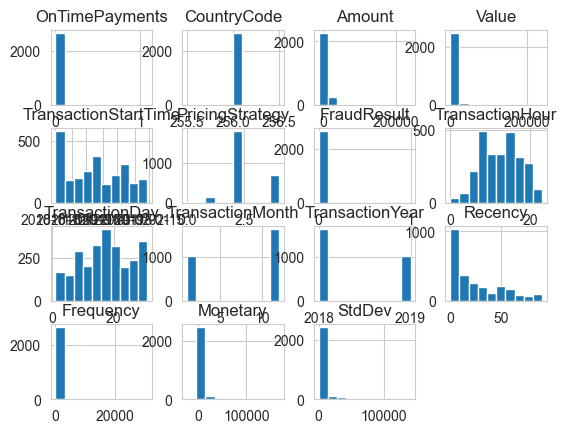

In [10]:
rfms_df.hist()

## Outliers detection in RFMS features

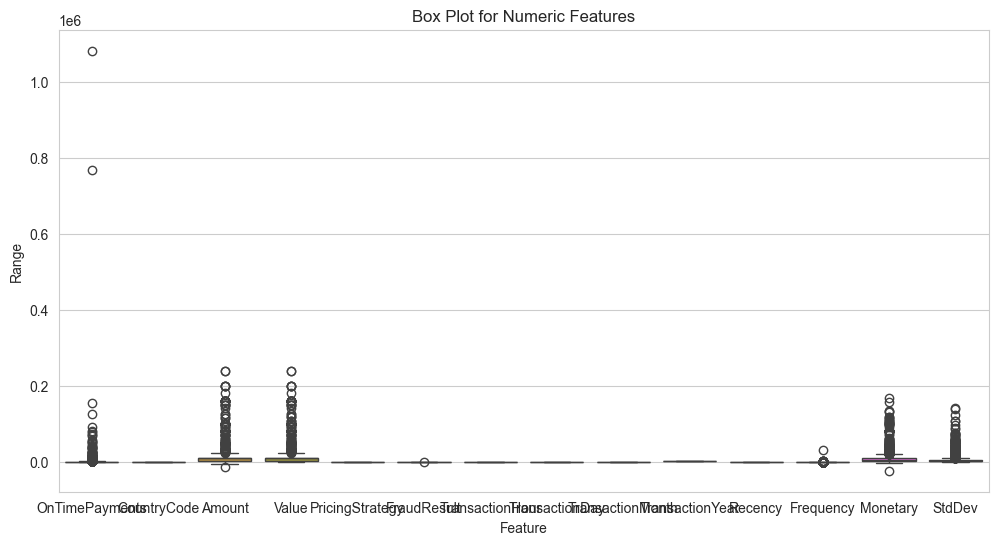

In [11]:
outlier_indices = detect_rfms_outliers(rfms_df)

## MinMaxScaler Transformation of RFMS Feature

In [12]:
scaled_df = scale_features(rfms_df)
scaled_df.describe()

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,StdDev
count,2643.000000,2643.0,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,0.001613,0.0,0.101396,0.046690,0.614548,0.000378,0.545970,0.521718,0.598700,0.385925,0.274789,0.001060,0.166685,0.037918
std,0.024572,0.0,0.086541,0.092035,0.240554,0.019451,0.213964,0.270584,0.455835,0.486905,0.279754,0.019537,0.070318,0.076103
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000006,0.0,0.062868,0.005421,0.500000,0.000000,0.391304,0.333333,0.000000,0.000000,0.044444,0.000065,0.135779,0.005710
50%,0.000030,0.0,0.096267,0.040867,0.500000,0.000000,0.565217,0.500000,0.909091,0.000000,0.155556,0.000227,0.153287,0.016654
75%,0.000173,0.0,0.096267,0.040867,1.000000,0.000000,0.739130,0.733333,1.000000,1.000000,0.500000,0.000615,0.171135,0.030957
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
scaled_df.head()

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,...,TransactionId,BatchId,AccountId,SubscriptionId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,0.000005,0.0,0.096267,0.040867,0.5,0.0,0.304348,0.500000,0.909091,0.0,...,TransactionId_11879,BatchId_61924,AccountId_661,SubscriptionId_4753,UGX,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2018-11-16 07:53:19+00:00
1,0.000005,0.0,0.056189,0.000000,0.5,0.0,0.347826,0.500000,0.909091,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.000019,0.0,0.062868,0.005421,1.0,0.0,0.782609,0.466667,0.909091,0.0,...,TransactionId_64687,BatchId_30141,AccountId_4841,SubscriptionId_3829,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-16 08:16:36+00:00
3,0.000006,0.0,0.096267,0.040867,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.000006,0.0,0.053045,0.003336,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


array([[<Axes: title={'center': 'OnTimePayments'}>,
        <Axes: title={'center': 'CountryCode'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Value'}>],
       [<Axes: title={'center': 'PricingStrategy'}>,
        <Axes: title={'center': 'FraudResult'}>,
        <Axes: title={'center': 'TransactionHour'}>,
        <Axes: title={'center': 'TransactionDay'}>],
       [<Axes: title={'center': 'TransactionMonth'}>,
        <Axes: title={'center': 'TransactionYear'}>,
        <Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>,
        <Axes: title={'center': 'TransactionStartTime'}>, <Axes: >]],
      dtype=object)

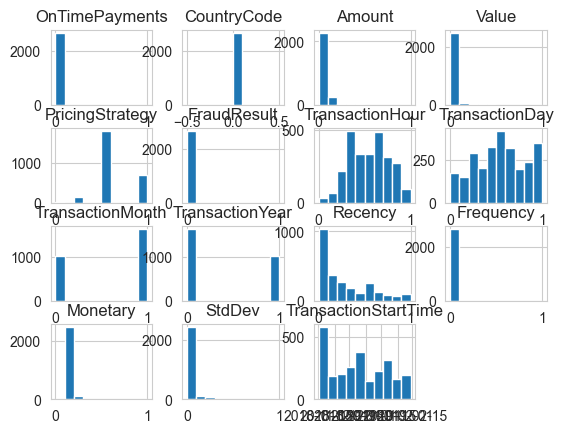

In [14]:
scaled_df.hist()

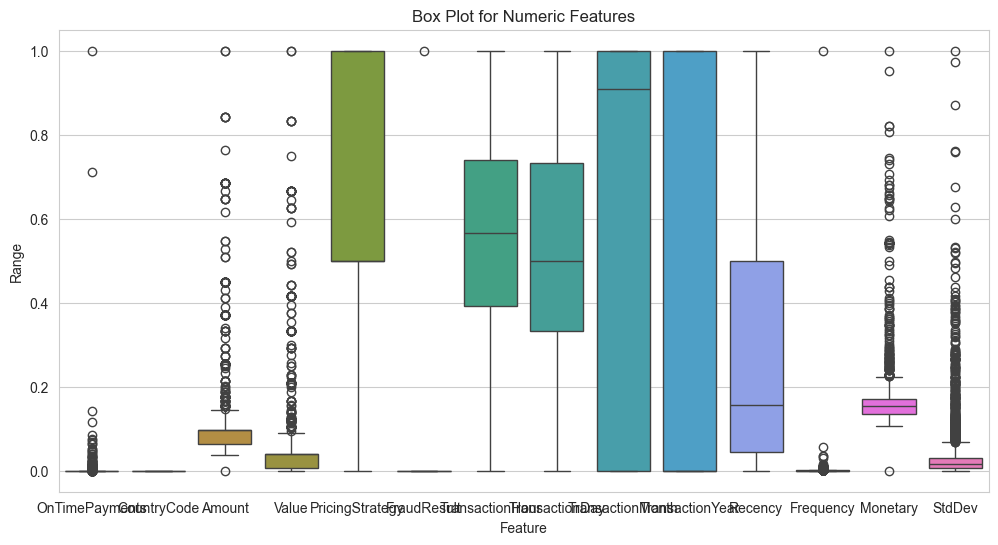

In [15]:
outlier_indices = detect_rfms_outliers(scaled_df)

## Visualizing in RFMS Space

### Comparative Scoring

In [16]:
bn_rfms_df =  assign_comparative_binary_score(scaled_df)
bn_rfms_df

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,...,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,>OnTimePayment_avg
0,0.000005,0.0,0.096267,0.040867,0.5,0.0,0.304348,0.500000,0.909091,0.0,...,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2018-11-16 07:53:19+00:00,0,0,1,0,0
1,0.000005,0.0,0.056189,0.000000,0.5,0.0,0.347826,0.500000,0.909091,0.0,...,NaN,NaN,NaN,NaN,NaT,1,1,0,0,0
2,0.000019,0.0,0.062868,0.005421,1.0,0.0,0.782609,0.466667,0.909091,0.0,...,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-16 08:16:36+00:00,0,0,0,0,0
3,0.000006,0.0,0.096267,0.040867,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,NaN,NaN,NaN,NaN,NaT,1,0,0,0,0
4,0.000006,0.0,0.053045,0.003336,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,NaN,NaN,NaN,NaN,NaT,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2019-02-08 10:23:23+00:00,0,0,0,0,0
89011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2019-01-18 15:51:50+00:00,0,0,0,0,0
89016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ProviderId_6,ProductId_3,airtime,ChannelId_3,2018-11-15 18:37:07+00:00,0,0,0,0,0
89117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ProviderId_1,ProductId_15,financial_services,ChannelId_3,2018-12-07 14:37:54+00:00,0,0,0,0,0


### User classification

In [17]:
classified_df = apply_classification(bn_rfms_df)
classified_df.head()

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,...,ProductCategory,ChannelId,TransactionStartTime,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,>OnTimePayment_avg,Classification,Binary_Classification
0,0.000005,0.0,0.096267,0.040867,0.5,0.0,0.304348,0.500000,0.909091,0.0,...,financial_services,ChannelId_3,2018-11-16 07:53:19+00:00,0,0,1,0,0,High-risk,1
1,0.000005,0.0,0.056189,0.000000,0.5,0.0,0.347826,0.500000,0.909091,0.0,...,NaN,NaN,NaT,1,1,0,0,0,Low-risk,0
2,0.000019,0.0,0.062868,0.005421,1.0,0.0,0.782609,0.466667,0.909091,0.0,...,financial_services,ChannelId_2,2018-11-16 08:16:36+00:00,0,0,0,0,0,High-risk,1
3,0.000006,0.0,0.096267,0.040867,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,NaN,NaN,NaT,1,0,0,0,0,High-risk,1
4,0.000006,0.0,0.053045,0.003336,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,NaN,NaN,NaT,1,1,0,0,0,Low-risk,0


In [18]:
classified_df.columns

Index(['OnTimePayments', 'CountryCode', 'Amount', 'Value', 'PricingStrategy',
       'FraudResult', 'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'Recency', 'Frequency', 'Monetary', 'StdDev',
       'CustomerId', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime', '<Recency_avg', '>Frequency_avg',
       '>Monetary_avg', '>StdDev_avg', '>OnTimePayment_avg', 'Classification',
       'Binary_Classification'],
      dtype='object')

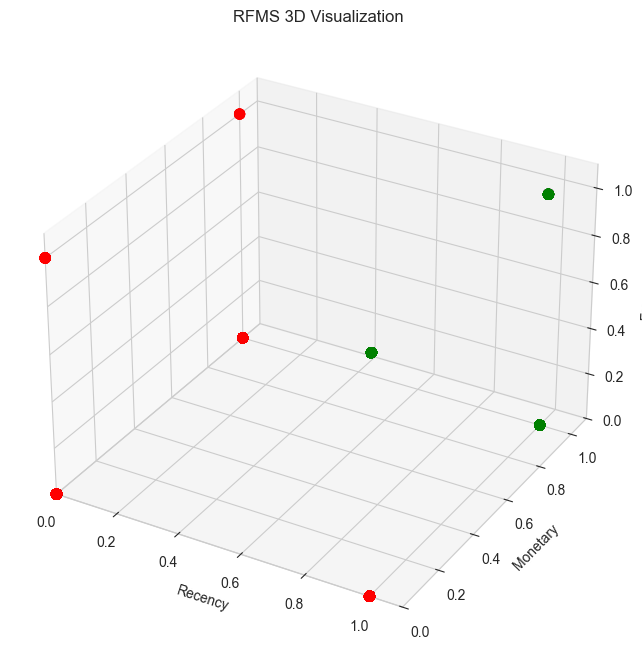

In [19]:
visualize_rfms(classified_df)

## Perform Weight of Evidence (WoE) binning 

In [20]:
features = [
    'Recency', 'Frequency', 'Monetary', 'StdDev', 'OnTimePayments',
    '<Recency_avg', '>Frequency_avg', '>Monetary_avg', '>StdDev_avg',
    '>OnTimePayment_avg'
]


woe_df, woe_info, iv_info = woe_binning(classified_df, features, target='Classification')

print("WoE Info:")
print(woe_info)

print("\nIV Info:")
print(iv_info)

C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:420: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_good = df[target].value_counts()[0]
C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:421: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_bad = df[target].value_counts()[1]
C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:427: FutureWarning: The default of

WoE Info:
{'Recency': Recency_bin
(-0.001, 0.0333]    2.000745
(0.0333, 0.0556]    2.035034
(0.0556, 0.1]       1.180972
(0.1, 0.156]        1.709563
(0.156, 0.267]      1.065053
(0.267, 0.389]     -4.593076
(0.389, 0.556]     -4.612161
(0.556, 0.711]     -4.634592
(0.711, 1.0]       -4.565731
Name: WoE, dtype: float64, 'Frequency': Frequency_bin
(-0.001, 3.24e-05]     -1.480146
(3.24e-05, 6.47e-05]    0.803028
(6.47e-05, 9.71e-05]   -0.401463
(9.71e-05, 0.000162]    0.725201
(0.000162, 0.000227]    0.736848
(0.000227, 0.000324]    0.362894
(0.000324, 0.000486]    0.670187
(0.000486, 0.000809]    0.417023
(0.000809, 0.00155]     1.870067
(0.00155, 1.0]          3.731408
Name: WoE, dtype: float64, 'Monetary': Monetary_bin
(-0.001, 0.13]   -1.908370
(0.13, 0.134]    -0.388804
(0.134, 0.138]    0.260213
(0.138, 0.144]    0.695532
(0.144, 0.153]    0.418873
(0.153, 0.163]    0.111009
(0.163, 0.17]     1.338666
(0.17, 0.177]     2.078793
(0.177, 0.19]     2.233190
(0.19, 1.0]       1.575588

C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:420: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_good = df[target].value_counts()[0]
C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:421: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_bad = df[target].value_counts()[1]
C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:427: FutureWarning: The default of

In [21]:
woe_df

,OnTimePayments,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,...,Recency_WoE,Frequency_WoE,Monetary_WoE,StdDev_WoE,OnTimePayments_WoE,<Recency_avg_WoE,>Frequency_avg_WoE,>Monetary_avg_WoE,>StdDev_avg_WoE,>OnTimePayment_avg_WoE
0,0.000005,0.0,0.096267,0.040867,0.5,0.0,0.304348,0.500000,0.909091,0.0,...,-4.565731,-0.401463,1.338666,1.460651,1.348808,0.0,0.0,0.0,0.0,0.0
1,0.000005,0.0,0.056189,0.000000,0.5,0.0,0.347826,0.500000,0.909091,0.0,...,2.000745,3.731408,-1.908370,1.802396,1.348808,0.0,0.0,0.0,0.0,0.0
2,0.000019,0.0,0.062868,0.005421,1.0,0.0,0.782609,0.466667,0.909091,0.0,...,-4.593076,0.725201,-1.908370,-1.403036,0.706915,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.0,0.096267,0.040867,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,1.709563,0.725201,0.111009,0.421532,-0.868598,0.0,0.0,0.0,0.0,0.0
4,0.000006,0.0,0.053045,0.003336,0.5,0.0,0.608696,0.000000,0.090909,1.0,...,2.000745,3.731408,-1.908370,-1.403036,-0.868598,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
89011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
89016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
89117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Extract Time Features

In [22]:
processed_data = extract_time_features(processed_data)
processed_data.head()
processed_data.info()

NameError: name 'processed_data' is not defined

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

## Handle Missing Values

In [ ]:
processed_data = handle_missing_values(processed_data)
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
non_fraud_df = processed_data[processed_data['FraudResult'] == 1.0]
print(f"Number of fraudulent transactions: {len(non_fraud_df)}")

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Encode Categorical Variables

In [ ]:
processed_data = encode_categorical_variables(processed_data)
processed_data.info()

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Normalize/Standardize Numerical Features

In [ ]:
processed_data = normalize_and_standardize_numerical_features(processed_data)

In [ ]:
processed_data['FraudResult'].unique()

In [ ]:
processed_data.head()

In [ ]:
processed_data.info()

In [ ]:
processed_data

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Save the the processed dataset

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(processed_data, output_folder, filename)